In [1]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()

Saving ASVspoof2017_V2_train.trn.txt to ASVspoof2017_V2_train.trn.txt


In [6]:
protocol_path = list(uploaded.keys())[0]

In [7]:
protocol_df = pd.read_csv(protocol_path, sep='\s+', header=None,
                          names=['filename', 'label', 'meta1', 'meta2', 'meta3', 'meta4', 'meta5'])


In [8]:
protocol_df.head()

,filename,label,meta1,meta2,meta3,meta4,meta5
0,T_1000001.wav,genuine,M0002,S05,-,-,-
1,T_1000002.wav,genuine,M0002,S09,-,-,-
2,T_1000003.wav,genuine,M0002,S01,-,-,-
3,T_1000004.wav,genuine,M0002,S10,-,-,-
4,T_1000005.wav,genuine,M0002,S04,-,-,-


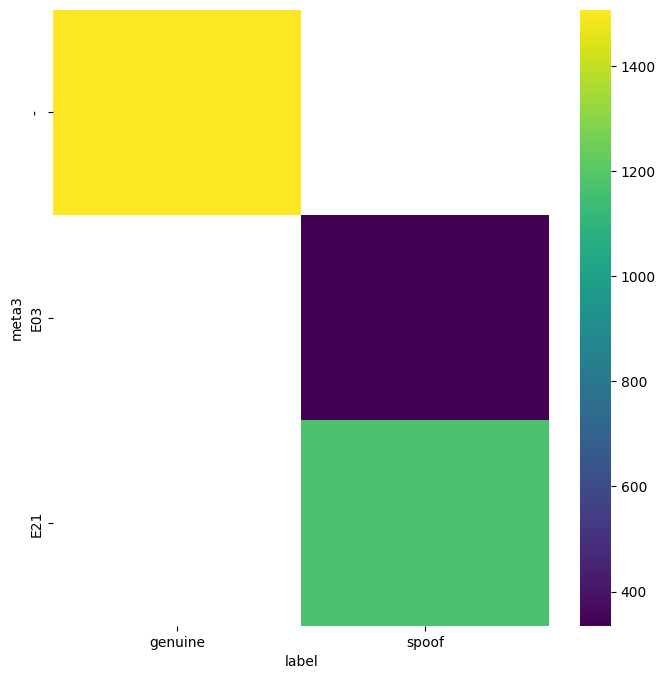

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['meta3'].value_counts()
    for x_label, grp in protocol_df.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('meta3')

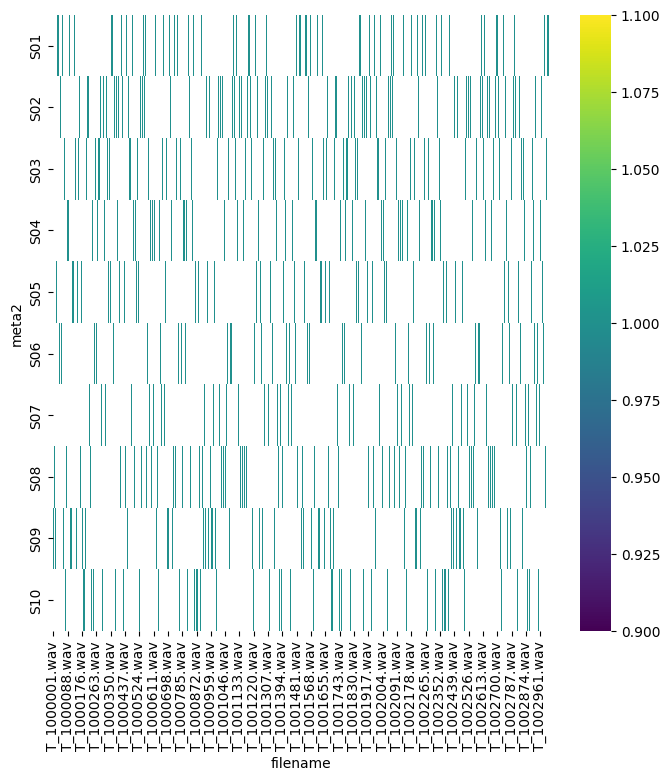

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['meta2'].value_counts()
    for x_label, grp in protocol_df.groupby('filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filename')
_ = plt.ylabel('meta2')

In [11]:
label_mapping = {row['filename']: 0 if row['label'].lower() == "genuine" else 1
                 for _, row in protocol_df.iterrows()}

In [12]:
print("Sample mapping:", list(label_mapping.items())[:5])

Sample mapping: [('T_1000001.wav', 0), ('T_1000002.wav', 0), ('T_1000003.wav', 0), ('T_1000004.wav', 0), ('T_1000005.wav', 0)]


In [23]:
import numpy as np
import librosa
import tensorflow as tf
from glob import glob
import os

In [14]:
from google.colab import files
uploaded = files.upload()

Saving ASVspoof2017_V2_train.zip to ASVspoof2017_V2_train.zip


In [15]:
DATA_DIR = list(uploaded.keys())[0]

In [29]:
import zipfile

In [67]:
# I had to do this because the the zip was not loading properly so needed to check
with zipfile.ZipFile(DATA_DIR, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        print(file_name)

ASVspoof2017_V2_train/
ASVspoof2017_V2_train/T_1002170.wav
ASVspoof2017_V2_train/T_1001876.wav
ASVspoof2017_V2_train/T_1001404.wav
ASVspoof2017_V2_train/T_1000991.wav
ASVspoof2017_V2_train/T_1000244.wav
ASVspoof2017_V2_train/T_1002511.wav
ASVspoof2017_V2_train/T_1002963.wav
ASVspoof2017_V2_train/T_1002028.wav
ASVspoof2017_V2_train/T_1002449.wav
ASVspoof2017_V2_train/T_1000818.wav
ASVspoof2017_V2_train/T_1002498.wav
ASVspoof2017_V2_train/T_1000688.wav
ASVspoof2017_V2_train/T_1000659.wav
ASVspoof2017_V2_train/T_1001019.wav
ASVspoof2017_V2_train/T_1001478.wav
ASVspoof2017_V2_train/T_1000238.wav
ASVspoof2017_V2_train/T_1000701.wav
ASVspoof2017_V2_train/T_1001141.wav
ASVspoof2017_V2_train/T_1002054.wav
ASVspoof2017_V2_train/T_1001520.wav
ASVspoof2017_V2_train/T_1001952.wav
ASVspoof2017_V2_train/T_1001287.wav
ASVspoof2017_V2_train/T_1000360.wav
ASVspoof2017_V2_train/T_1002847.wav
ASVspoof2017_V2_train/T_1002435.wav
ASVspoof2017_V2_train/T_1002392.wav
ASVspoof2017_V2_train/T_1002896.wav
ASVsp

In [69]:
# this was taken from gpt I totally don't understand what was wrong with the data loading
import os
import zipfile
from glob import glob

# Create a directory for the extracted files if it doesn't exist
EXTRACT_DIR = "extracted_audio"  # Change this to your preferred directory name
os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(DATA_DIR, 'r') as zip_ref:
    print("Files in zip:", zip_ref.namelist())
    zip_ref.extractall(EXTRACT_DIR)
folder_name = "ASVspoof2017_V2_train"
wav_files = glob(os.path.join(EXTRACT_DIR, folder_name, "*.wav"))

print(f"Found {len(wav_files)} audio files.")

Files in zip: ['ASVspoof2017_V2_train/', 'ASVspoof2017_V2_train/T_1002170.wav', 'ASVspoof2017_V2_train/T_1001876.wav', 'ASVspoof2017_V2_train/T_1001404.wav', 'ASVspoof2017_V2_train/T_1000991.wav', 'ASVspoof2017_V2_train/T_1000244.wav', 'ASVspoof2017_V2_train/T_1002511.wav', 'ASVspoof2017_V2_train/T_1002963.wav', 'ASVspoof2017_V2_train/T_1002028.wav', 'ASVspoof2017_V2_train/T_1002449.wav', 'ASVspoof2017_V2_train/T_1000818.wav', 'ASVspoof2017_V2_train/T_1002498.wav', 'ASVspoof2017_V2_train/T_1000688.wav', 'ASVspoof2017_V2_train/T_1000659.wav', 'ASVspoof2017_V2_train/T_1001019.wav', 'ASVspoof2017_V2_train/T_1001478.wav', 'ASVspoof2017_V2_train/T_1000238.wav', 'ASVspoof2017_V2_train/T_1000701.wav', 'ASVspoof2017_V2_train/T_1001141.wav', 'ASVspoof2017_V2_train/T_1002054.wav', 'ASVspoof2017_V2_train/T_1001520.wav', 'ASVspoof2017_V2_train/T_1001952.wav', 'ASVspoof2017_V2_train/T_1001287.wav', 'ASVspoof2017_V2_train/T_1000360.wav', 'ASVspoof2017_V2_train/T_1002847.wav', 'ASVspoof2017_V2_train/

In [54]:
def load_and_preprocess_wav(file_path, sr=16000, max_len=16000):
    # audio was loaded with help of librosa it help in converting the sound into a numerical array directly wiht fourier transformation and spectral analysis
    audio, _ = librosa.load(file_path, sr=sr)
    # to have a fixed input size for my model sr == 16000 for like 1 sec of audio 16khz sr so we cut it to 1 sec
    if len(audio) > max_len:
        audio = audio[:max_len]
    else:
        audio = np.pad(audio, (0, max_len - len(audio)))
    return audio

In [41]:
def get_label_from_mapping(file_path, mapping):
    # to get the file name indivisually
    filename = os.path.basename(file_path)
    return mapping.get(filename, None)

In [55]:
X, y = [], []
for f in wav_files:
    label = get_label_from_mapping(f, label_mapping)
    if label is not None:
        audio = load_and_preprocess_wav(f)
        X.append(audio)
        y.append(label)

In [68]:
from tensorflow.keras import layers, models

def build_model(input_shape=(16000, 1)):
    model = models.Sequential([
        # A 1D convonutional layer to process the raw audio waveform chose 32 for no. of feature then 64 64 a general choice
        # A stride of 16 to have a good convergence time alos padding is kept same to same output length as input
        layers.Conv1D(32, kernel_size=80, strides=16, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # to capture local features kept the kernel size ==3 rest is same just added the MaxPooling1D.
        # maxpooling was added to reduce dimensionality and also provides translation invariance
        layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Dropout(0.3),

        # to avoid overfitting as reduces the no. of params
        layers.GlobalAveragePooling1D(),

        # fully connected layers
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 1000, 32)            │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1000, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1000, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 1000, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1000, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 500, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 500, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,409 (52.38 KB)

 Trainable params: 13,217 (51.63 KB)

 Non-trainable params: 192 (768.00 B)

In [57]:
X = np.array(X)[..., np.newaxis]
y = np.array(y)
print("Data shape:", X.shape, "Labels shape:", y.shape)

Data shape: (3014, 16000, 1) Labels shape: (3014,)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# this below convert to the tensorflow dataset this helps in making the data in pair of x,y here like sample and its label
# shuffled the data  and used in mini batches of 32 and prefetch the data to process and decrease latency
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.7392 - loss: 0.5205 - val_accuracy: 0.5572 - val_loss: 0.6736
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9405 - loss: 0.1819 - val_accuracy: 0.6119 - val_loss: 0.6570
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9540 - loss: 0.1350 - val_accuracy: 0.7297 - val_loss: 0.5976
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.9506 - loss: 0.1479 - val_accuracy: 0.8408 - val_loss: 0.5010
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.9616 - loss: 0.1033 - val_accuracy: 0.9171 - val_loss: 0.4039
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9649 - loss: 0.1009 - val_accuracy: 0.9652 - val_loss: 0.2984
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9778 - loss: 0.0701 - val_accuracy: 0.9635 - val_loss: 0.2024
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9631 - loss: 0.0909 - val_accu

In [62]:
import tensorflow as tf
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',

    ]
)

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Optionally, print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Precision: 0.9761
Recall: 0.9795
F1-Score: 0.9778
ROC-AUC: 0.9961
Confusion Matrix:
[[304   7]
 [  6 286]]


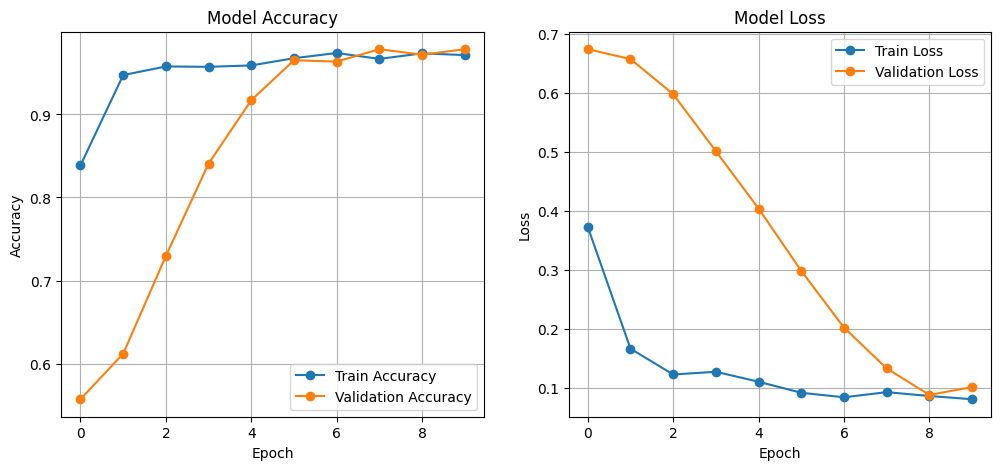

In [64]:
# accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
